## 이미지 전처리 코드

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
from tqdm import tqdm
import cv2
import numpy as np
import shutil
from matplotlib import pyplot as plt
import matplotlib.cm as cm

import tensorflow as tf

import pickle
from tensorflow.keras import models, layers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import splitfolders

In [ ]:
!gdown 11elELWhhfTfcrAUNOIweXjz9hoLDPVOQ

Downloading...
From: https://drive.google.com/uc?id=11elELWhhfTfcrAUNOIweXjz9hoLDPVOQ
To: /content/data.zip
100% 174M/174M [00:02<00:00, 80.0MB/s]


In [ ]:
os.mkdir('data')
!unzip '/content/data.zip' -d./data

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ./data/12000000_2/12000000_2_720.jpg  
  inflating: ./data/12000000_2/12000000_2_717.jpg  
  inflating: ./data/12000000_2/12000000_2_714.jpg  
  inflating: ./data/12000000_2/12000000_2_746.jpg  
  inflating: ./data/12000000_2/12000000_2_713.jpg  
  inflating: ./data/12000000_2/12000000_2_712.jpg  
  inflating: ./data/12000000_2/12000000_2_710.jpg  
  inflating: ./data/12000000_2/12000000_2_735.jpg  
  inflating: ./data/12000000_2/12000000_2_702.jpg  
  inflating: ./data/12000000_2/12000000_2_701.jpg  
  inflating: ./data/12000000_2/12000000_2_719.jpg  
  inflating: ./data/12000000_2/12000000_2_695.jpg  
  inflating: ./data/12000000_2/12000000_2_705.jpg  
  inflating: ./data/12000000_2/12000000_2_699.jpg  
  inflating: ./data/12000000_2/12000000_2_707.jpg  
  inflating: ./data/12000000_2/12000000_2_680.jpg  
  inflating: ./data/12000000_2/12000000_2_691.jpg  
  inflating: ./data/12000000_2/12000000_2_697.jpg  
  inflating: ./data/12000000

In [ ]:
data_folder_path = '/content/data'
label_names = os.listdir(data_folder_path)
label_names

['18000000_4',
 '10000000_15',
 '10000000_17',
 '10000000_8',
 '12000000_3',
 '18000000_3',
 '10000000_4',
 '12000000_0',
 '12000000_4',
 '10000000_16',
 '18000000_5',
 '18000000_0',
 '18000000_6',
 '10000000_18',
 '10000000_0',
 '12000000_1',
 '16000000_0',
 '12000000_2',
 '16000000_1',
 '10000000_1',
 '18000000_1',
 '18000000_2',
 '12000000_5',
 '10000000_14']

In [ ]:
os.listdir(data_folder_path+'/'+label_names[0])

['18000000_4_1318.jpg',
 '18000000_4_759.jpg',
 '18000000_4_758.jpg',
 '18000000_4_1412.jpg',
 '18000000_4_1393.jpg',
 '18000000_4_563.jpg',
 '18000000_4_628.jpg',
 '18000000_4_1071.jpg',
 '18000000_4_132.jpg',
 '18000000_4_1309.jpg',
 '18000000_4_296.jpg',
 '18000000_4_1072.jpg',
 '18000000_4_1729.jpg',
 '18000000_4_2160.jpg',
 '18000000_4_878.jpg',
 '18000000_4_201.jpg',
 '18000000_4_247.jpg',
 '18000000_4_839.jpg',
 '18000000_4_524.jpg',
 '18000000_4_300.jpg',
 '18000000_4_932.jpg',
 '18000000_4_1951.jpg',
 '18000000_4_1403.jpg',
 '18000000_4_1879.jpg',
 '18000000_4_2087.jpg',
 '18000000_4_394.jpg',
 '18000000_4_213.jpg',
 '18000000_4_1734.jpg',
 '18000000_4_1611.jpg',
 '18000000_4_987.jpg',
 '18000000_4_423.jpg',
 '18000000_4_1570.jpg',
 '18000000_4_118.jpg',
 '18000000_4_315.jpg',
 '18000000_4_1693.jpg',
 '18000000_4_1959.jpg',
 '18000000_4_381.jpg',
 '18000000_4_891.jpg',
 '18000000_4_502.jpg',
 '18000000_4_2079.jpg',
 '18000000_4_1563.jpg',
 '18000000_4_1961.jpg',
 '18000000_4_2

### 데이터셋 딕셔너리에 이미지 경로 저장

In [ ]:
# 카테고리별로 이미지파일 경로 리스트 사전 만들기
# keys : 카테고리명
# values : 리스트 of 이미지 경로들
dataset = {} # 카테고리명 : [이미지1경로, 이미지2경로, ...]

for label in os.listdir(data_folder_path):
    sub_path = data_folder_path+'/'+label+'/'
    dataset[label] = []
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

dataset

{'18000000_4': ['/content/data/18000000_4/18000000_4_1318.jpg',
  '/content/data/18000000_4/18000000_4_759.jpg',
  '/content/data/18000000_4/18000000_4_758.jpg',
  '/content/data/18000000_4/18000000_4_1412.jpg',
  '/content/data/18000000_4/18000000_4_1393.jpg',
  '/content/data/18000000_4/18000000_4_563.jpg',
  '/content/data/18000000_4/18000000_4_628.jpg',
  '/content/data/18000000_4/18000000_4_1071.jpg',
  '/content/data/18000000_4/18000000_4_132.jpg',
  '/content/data/18000000_4/18000000_4_1309.jpg',
  '/content/data/18000000_4/18000000_4_296.jpg',
  '/content/data/18000000_4/18000000_4_1072.jpg',
  '/content/data/18000000_4/18000000_4_1729.jpg',
  '/content/data/18000000_4/18000000_4_2160.jpg',
  '/content/data/18000000_4/18000000_4_878.jpg',
  '/content/data/18000000_4/18000000_4_201.jpg',
  '/content/data/18000000_4/18000000_4_247.jpg',
  '/content/data/18000000_4/18000000_4_839.jpg',
  '/content/data/18000000_4/18000000_4_524.jpg',
  '/content/data/18000000_4/18000000_4_300.jpg'

In [ ]:
# label2index, index2label 딕셔너리 생성
label2index = {}
index2label = {}
i = 0
for label in label_names:
    label2index[label] = i
    index2label[i] = label
    i += 1

print(label2index, index2label)

{'18000000_4': 0, '10000000_15': 1, '10000000_17': 2, '10000000_8': 3, '12000000_3': 4, '18000000_3': 5, '10000000_4': 6, '12000000_0': 7, '12000000_4': 8, '10000000_16': 9, '18000000_5': 10, '18000000_0': 11, '18000000_6': 12, '10000000_18': 13, '10000000_0': 14, '12000000_1': 15, '16000000_0': 16, '12000000_2': 17, '16000000_1': 18, '10000000_1': 19, '18000000_1': 20, '18000000_2': 21, '12000000_5': 22, '10000000_14': 23} {0: '18000000_4', 1: '10000000_15', 2: '10000000_17', 3: '10000000_8', 4: '12000000_3', 5: '18000000_3', 6: '10000000_4', 7: '12000000_0', 8: '12000000_4', 9: '10000000_16', 10: '18000000_5', 11: '18000000_0', 12: '18000000_6', 13: '10000000_18', 14: '10000000_0', 15: '12000000_1', 16: '16000000_0', 17: '12000000_2', 18: '16000000_1', 19: '10000000_1', 20: '18000000_1', 21: '18000000_2', 22: '12000000_5', 23: '10000000_14'}


### 사이즈가 144*144가 아닌 파일이 있는 경우 결과 출력됨

In [ ]:
for label, img_paths in dataset.items():
    for i in img_paths:
        img = cv2.imread(i)
        try:
            if img.shape != (144, 144, 3):
                print(cv2.imread(i).shape)
                print(i)
        except:
            print('Error')
            print(i)
            pass

### Dataset 분리

In [ ]:
splitfolders.ratio('/content/data', output='dataset', seed=77, ratio=(0.6, 0.2, 0.2))

Copying files: 19120 files [00:02, 7050.36 files/s]


In [ ]:
train_folder_path = '/content/dataset/train'
test_folder_path = '/content/dataset/test'
val_folder_path = '/content/dataset/val'
train_dataset = {}
test_dataset = {}
val_dataset = {}

# 이미지와 라벨 리스트에 담기
for label in os.listdir(train_folder_path):
    sub_path = train_folder_path+'/'+label+'/'
    train_dataset[label] = []
    for filename in os.listdir(sub_path):
        train_dataset[label].append(sub_path+filename)

for label in os.listdir(test_folder_path):
    sub_path = test_folder_path+'/'+label+'/'
    test_dataset[label] = []
    for filename in os.listdir(sub_path):
        test_dataset[label].append(sub_path+filename)
        
for label in os.listdir(val_folder_path):
    sub_path = val_folder_path+'/'+label+'/'
    val_dataset[label] = []
    for filename in os.listdir(sub_path):
        val_dataset[label].append(sub_path+filename)
print(len(train_dataset), len(test_dataset), len(val_dataset))

24 24 24


In [ ]:
train_images = []
train_labels = []

for label, filenames in train_dataset.items():
    for filename in tqdm(filenames):
        image = cv2.imread(filename) # img를 array 형태로 변경
        train_images.append(image)
        train_labels.append([label2index[label]])

train_images = np.array(train_images)
train_labels = np.array(train_labels)

100%|██████████| 160/160 [00:00<00:00, 1744.63it/s]


In [ ]:
test_images = []
test_labels = []

for label, filenames in test_dataset.items():
    for filename in tqdm(filenames):
        image = cv2.imread(filename) # img를 array 형태로 변경
        test_images.append(image)
        test_labels.append([label2index[label]])

test_images = np.array(test_images)
test_labels = np.array(test_labels)

100%|██████████| 54/54 [00:00<00:00, 1123.27it/s]


In [ ]:
val_images = []
val_labels = []

for label, filenames in val_dataset.items():
    for filename in tqdm(filenames):
        image = cv2.imread(filename) # img를 array 형태로 변경
        val_images.append(image)
        val_labels.append([label2index[label]])

val_images = np.array(val_images)
val_labels = np.array(val_labels)

100%|██████████| 53/53 [00:00<00:00, 863.72it/s]


In [ ]:
print(train_images.shape, test_images.shape, val_images.shape)
print(train_labels.shape, test_labels.shape, val_labels.shape)
# print(len(train_labels), len(test_labels), len(val_labels))

(11463, 144, 144, 3) (3840, 144, 144, 3) (3817, 144, 144, 3)
(11463, 1) (3840, 1) (3817, 1)


In [ ]:
y_train = tf.keras.utils.to_categorical(train_labels, len(label_names))
y_test = tf.keras.utils.to_categorical(test_labels, len(label_names))
y_val = tf.keras.utils.to_categorical(val_labels, len(label_names))

y_train.shape, y_test.shape, y_val.shape

((11463, 24), (3840, 24), (3817, 24))

1712


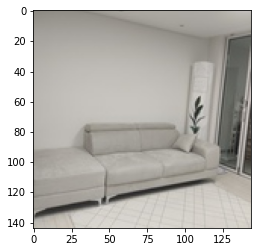

In [ ]:
idx = np.random.randint(0, train_images.shape[0], 1)[0]
print(idx)

plt.imshow(cv2.cvtColor(train_images[idx], cv2.COLOR_BGR2RGB))

#### Zero-centering

In [ ]:
# zero-centering
compute_mean = lambda imgs : np.mean(imgs, axis=0)
mean_img = compute_mean(train_images)
mean_img.shape

(144, 144, 3)

In [ ]:
sub_mean_img = lambda image : image.astype('int8') - mean_img.astype('int8')
x_train = sub_mean_img(train_images)
x_test = sub_mean_img(test_images)
x_val = sub_mean_img(val_images)
x_train.shape, x_test.shape, x_val.shape

((11463, 144, 144, 3), (3840, 144, 144, 3), (3817, 144, 144, 3))

### resnet50 pretrained model

In [ ]:
resnet_v1 = ResNet50(include_top=False, input_shape = (144 ,144 ,3), weights = 'imagenet')

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
resnet_v1.output_shape

(None, 5, 5, 2048)

In [ ]:
# model.Sequential()없이 모델 구축하는 방법
inputs = tf.keras.Input(shape=(144 ,144 ,3))

x = resnet_v1(inputs, training=False)
x = tf.keras.layers.Flatten(input_shape=resnet_v1.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
# x= tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
# x= tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(len(label_names), activation='softmax')(x)

model_resnet_v1 = tf.keras.Model(inputs, outputs)

In [ ]:
model_resnet_v1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 144, 144, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               13107456  
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 24)                3096      
                                                                 
Total params: 36,731,160
Trainable params: 36,678,040
Non-t

In [ ]:
# categorical_crossentropy
model_resnet_v1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])
# Early Stopping
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# 모델 fitting
model_resnet_v1.fit(x_train, y_train, epochs = 50, validation_data=(x_val, y_val), batch_size=64, callbacks=[early])

Epoch 1/50
180/180 [==============================] - 93s 336ms/step - loss: 2.8481 - accuracy: 0.1355 - val_loss: 2.4592 - val_accuracy: 0.2481
Epoch 2/50
180/180 [==============================] - 59s 326ms/step - loss: 2.0581 - accuracy: 0.3502 - val_loss: 1.8165 - val_accuracy: 0.3953
Epoch 3/50
180/180 [==============================] - 59s 326ms/step - loss: 1.6719 - accuracy: 0.4471 - val_loss: 1.6298 - val_accuracy: 0.4580
Epoch 4/50
180/180 [==============================] - 58s 325ms/step - loss: 1.4666 - accuracy: 0.5140 - val_loss: 1.5695 - val_accuracy: 0.4912
Epoch 5/50
180/180 [==============================] - 58s 325ms/step - loss: 1.3060 - accuracy: 0.5559 - val_loss: 1.5045 - val_accuracy: 0.5111
Epoch 6/50
180/180 [==============================] - 58s 325ms/step - loss: 1.1770 - accuracy: 0.5909 - val_loss: 2.6228 - val_accuracy: 0.4069
Epoch 7/50
180/180 [==============================] - 58s 325ms/step - loss: 1.1256 - accuracy: 0.6070 - val_loss: 1.4300 - val_ac

In [ ]:
pred_resnet50 = model_resnet_v1.predict(x_test)
label_test = np.argmax(y_test, axis=1)
accuracy_score(np.argmax(pred_resnet50, axis = 1), label_test)

120/120 [==============================] - 6s 46ms/step


0.49296875

#### Top-3 Accuracy

In [ ]:
top3_acc = tf.keras.metrics.TopKCategoricalAccuracy(k=3)
top3_acc.update_state(y_test, pred_resnet50)
print("Top-3 Accuracy:", top3_acc.result().numpy())

Top-5 Accuracy: 0.76197916


### Alexnet

In [ ]:
model_alexnet = tf.keras.Sequential()

model_alexnet.add(layers.Conv2D(48, (11, 11), strides=4, activation = 'relu', input_shape = (144, 144, 3)))
model_alexnet.add(layers.Lambda(tf.nn.local_response_normalization))
model_alexnet.add(layers.MaxPooling2D((3, 3), strides=2))

model_alexnet.add(layers.Conv2D(128, (5, 5), strides = 1, padding='same', activation = 'relu'))
model_alexnet.add(layers.Lambda(tf.nn.local_response_normalization))
model_alexnet.add(layers.MaxPooling2D((3, 3), strides=2))

model_alexnet.add(layers.Conv2D(192, (3, 3), padding='same',  activation = 'relu'))
model_alexnet.add(layers.Conv2D(192, (3, 3), padding='same', activation = 'relu'))
model_alexnet.add(layers.Conv2D(128, (3, 3), padding='same', activation = 'relu'))
model_alexnet.add(layers.MaxPooling2D((3, 3), strides=2))

model_alexnet.add(layers.Flatten())
model_alexnet.add(layers.Dense(256, activation = 'relu'))
model_alexnet.add(layers.Dense(128, activation = 'relu'))
model_alexnet.add(layers.Dense(len(label_names), activation = 'softmax'))

In [ ]:
model_alexnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 34, 34, 48)        17472     
                                                                 
 lambda_2 (Lambda)           (None, 34, 34, 48)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 48)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 128)       153728    
                                                                 
 lambda_3 (Lambda)           (None, 16, 16, 128)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [ ]:
# categorical_crossentropy
model_alexnet.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])
# Early Stopping
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# 모델 fitting
model_alexnet.fit(x_train, y_train, epochs = 50, validation_data=(x_val, y_val), batch_size=64, callbacks=[early])

Epoch 1/50
180/180 [==============================] - 9s 35ms/step - loss: 2.9235 - accuracy: 0.1165 - val_loss: 2.7656 - val_accuracy: 0.1622
Epoch 2/50
180/180 [==============================] - 5s 30ms/step - loss: 2.3874 - accuracy: 0.2692 - val_loss: 2.2569 - val_accuracy: 0.2960
Epoch 3/50
180/180 [==============================] - 5s 31ms/step - loss: 1.9886 - accuracy: 0.3720 - val_loss: 2.1013 - val_accuracy: 0.3408
Epoch 4/50
180/180 [==============================] - 6s 31ms/step - loss: 1.7671 - accuracy: 0.4263 - val_loss: 2.0969 - val_accuracy: 0.3676
Epoch 5/50
180/180 [==============================] - 5s 30ms/step - loss: 1.6081 - accuracy: 0.4712 - val_loss: 1.6643 - val_accuracy: 0.4561
Epoch 6/50
180/180 [==============================] - 6s 32ms/step - loss: 1.4844 - accuracy: 0.4997 - val_loss: 1.7431 - val_accuracy: 0.4414
Epoch 7/50
180/180 [==============================] - 5s 30ms/step - loss: 1.3815 - accuracy: 0.5261 - val_loss: 1.6009 - val_accuracy: 0.4763

In [ ]:
pred_alexnet = model_alexnet.predict(x_test)
label_test = np.argmax(y_test, axis=1)
accuracy_score(np.argmax(pred_alexnet, axis = 1), label_test)

120/120 [==============================] - 1s 5ms/step


0.546875

#### Top-3 Accuracy

In [ ]:
top3_acc = tf.keras.metrics.TopKCategoricalAccuracy(k=3)
top3_acc.update_state(y_test, pred_alexnet)
print("Top-3 Accuracy:", top3_acc.result().numpy())

Top-3 Accuracy: 0.76197916


In [ ]:
top3_classes = np.argsort(-pred_alexnet)[:, :3]
for i in range(len(x_test)):
    print("Sample", i)
    for j in range(3):
        print("  Top-", j+1, " class:", index2label[top3_classes[i][j]])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Sample 2590
  Top- 1  class: 12000000_1
  Top- 2  class: 12000000_4
  Top- 3  class: 10000000_15
Sample 2591
  Top- 1  class: 12000000_1
  Top- 2  class: 12000000_4
  Top- 3  class: 12000000_2
Sample 2592
  Top- 1  class: 12000000_1
  Top- 2  class: 10000000_0
  Top- 3  class: 18000000_1
Sample 2593
  Top- 1  class: 12000000_1
  Top- 2  class: 12000000_4
  Top- 3  class: 10000000_14
Sample 2594
  Top- 1  class: 12000000_1
  Top- 2  class: 12000000_4
  Top- 3  class: 12000000_5
Sample 2595
  Top- 1  class: 12000000_1
  Top- 2  class: 10000000_0
  Top- 3  class: 12000000_4
Sample 2596
  Top- 1  class: 12000000_1
  Top- 2  class: 10000000_0
  Top- 3  class: 10000000_1
Sample 2597
  Top- 1  class: 12000000_1
  Top- 2  class: 12000000_4
  Top- 3  class: 10000000_0
Sample 2598
  Top- 1  class: 12000000_1
  Top- 2  class: 12000000_4
  Top- 3  class: 12000000_5
Sample 2599
  Top- 1  class: 12000000_1
  Top- 2  class: 12000000_4
  Top- 3  class: 12000000_2
Sa

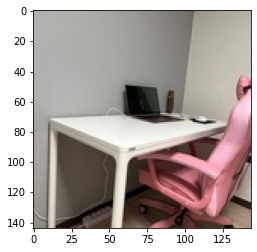

In [ ]:
plt.imshow(cv2.cvtColor(test_images[-2], cv2.COLOR_BGR2RGB))

In [ ]:
print(index2label[14])
print(index2label[23])
print(index2label[1])

10000000_0
10000000_14
10000000_15
